# Porto Kaggle Competition on Prediction Insurance Claims
---
Kaggle Porto Seguro’s Safe Driver Prediction: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

### Load Data

In [49]:
# import
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 20, 10

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [2]:
# load data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

print(train.shape)
print(test.shape)

(595212, 59)
(892816, 58)


In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [5]:
print(test.columns)

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtyp

### Visualization -  `target`

0    573518
1     21694
Name: target, dtype: int64


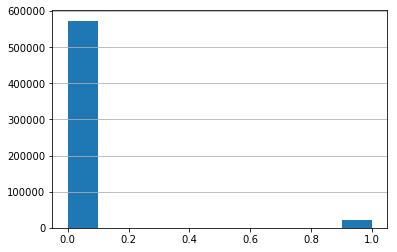

In [6]:
train.target.hist(grid="off");
plt.grid(axis="y")
# 1: claim filed
# 0: no claims
print(train.target.value_counts())

### Variable Investigation

Variables with same tag (i.e., `ind`, `reg`, `car`, `calc`) represents similar groupings. <br />
`bin` represents binary variable. <br />
`cat` represents categorical variable. <br />
Otherwise, the variable is either numerical or ordinal. <br />
Value of "-1" means the value is missing.

In [14]:
# continuous or ordinal variables
cont_ord_vars = [x for x in test.columns if x.count("_") == 2]
print(len(cont_ord_vars))
print(cont_ord_vars)

26
['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


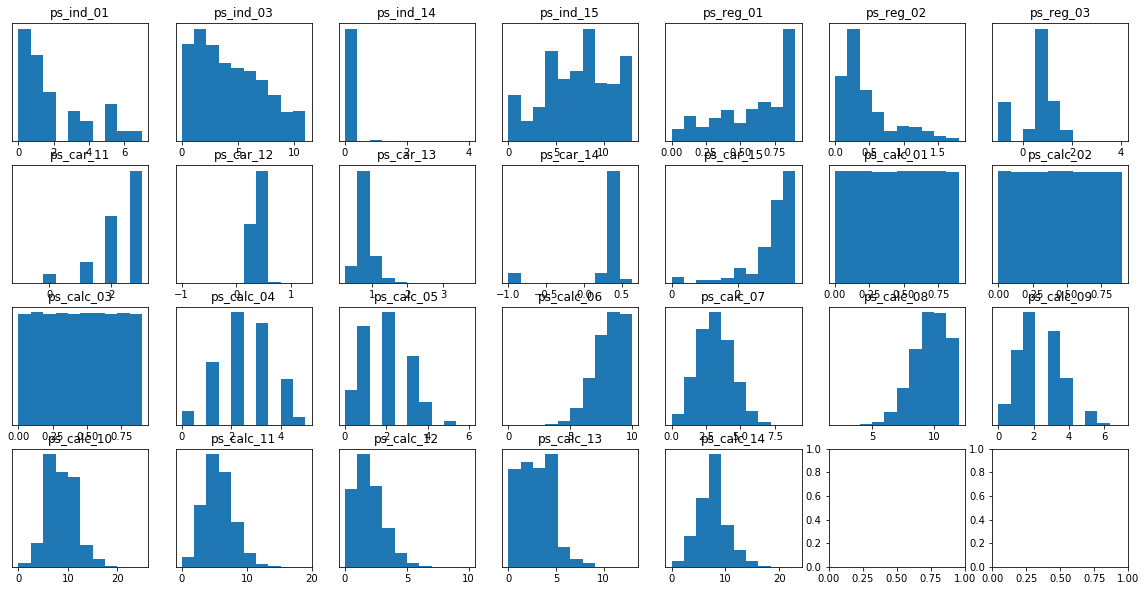

In [54]:
f, ax = plt.subplots(4,7)
for index, cname in enumerate(cont_ord_vars):
    r = index // 7
    c = index % 7
    ax[r][c].hist(train[cname])
    ax[r][c].set_title(cname)
    ax[r][c].set_yticks([])

Drop all `ps_calc_columns` which seems useless.

In [56]:
# binary variables
bin_vars = [x for x in test.columns if "bin" in x]
print(len(bin_vars))
print(bin_vars)

17
['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


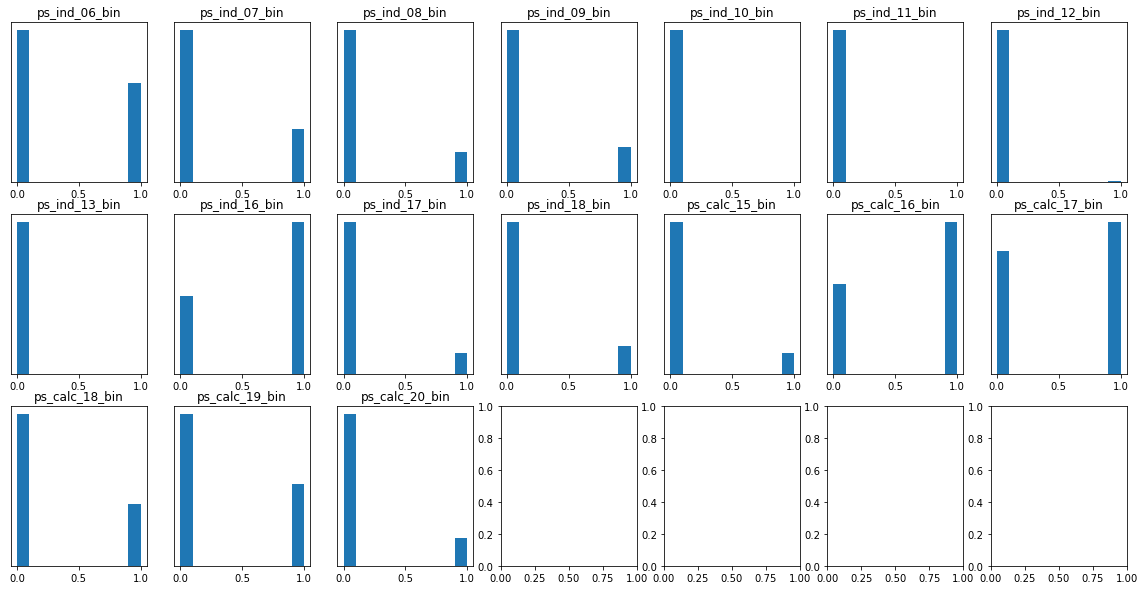

In [62]:
f, ax = plt.subplots(3,7)
for index, cname in enumerate(bin_vars):
    r = index // 7
    c = index % 7
    ax[r][c].hist(train[cname])
    ax[r][c].set_title(cname)
    ax[r][c].set_yticks([])

In [58]:
# continuous or ordinal variables
cat_vars = [x for x in test.columns if "cat" in x]
print(len(cat_vars))
print(cat_vars)

14
['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


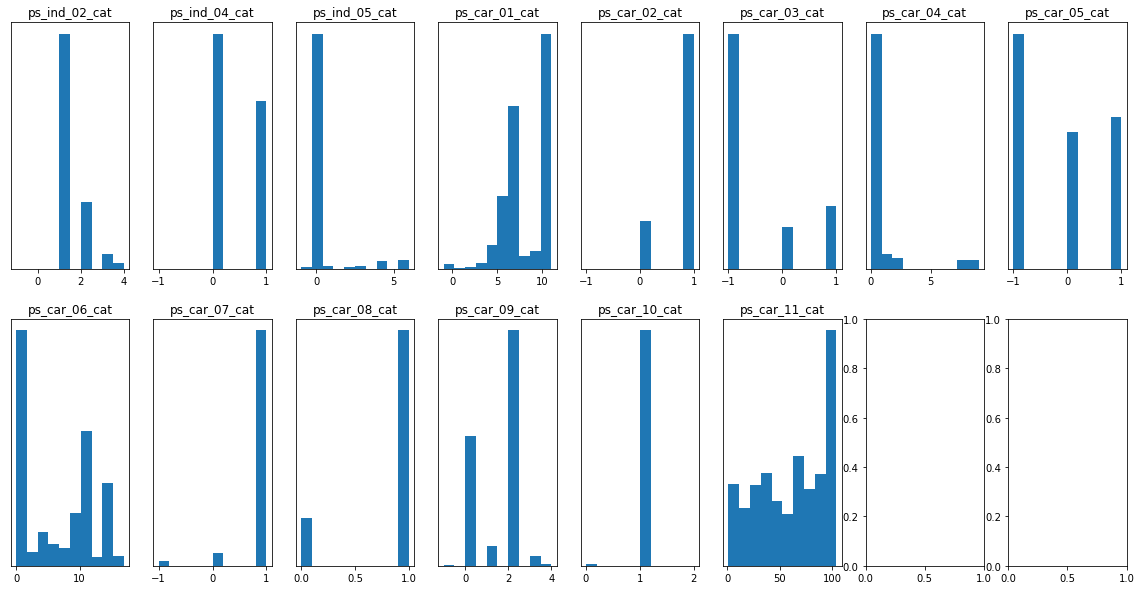

In [64]:
f, ax = plt.subplots(2,8)
for index, cname in enumerate(cat_vars):
    r = index // 8
    c = index % 8
    ax[r][c].hist(train[cname])
    ax[r][c].set_title(cname)
    ax[r][c].set_yticks([])

---
# Training

Some new stuff:
- Regularized Greedy Forest: https://arxiv.org/pdf/1109.0887.pdf, https://github.com/fukatani/rgf_python
- Light GBM: https://github.com/Microsoft/LightGBM
    - install: https://stackoverflow.com/questions/44937698/lightgbm-oserror-library-not-loaded
- Catboost: https://github.com/catboost/catboost

### Preprocessing

In [7]:
# split input and label
test_id = test.id

X_train = train.copy()
y_train = train.target
X_train.drop("id", axis=1, inplace=True)
X_train.drop("target", axis=1, inplace=True)

X_test = test.copy()
X_test.drop("id", axis=1, inplace=True)

In [8]:
_all = pd.concat([X_train, X_test], axis=0)
print(_all.shape)

(1488028, 57)


In [9]:
# categorical variable hoe
cat_vals = [x for x in _all.columns if x.endswith("_cat")]
print(cat_vals)

d = {}
for v in cat_vals:
    d[v] = _all[v].value_counts().size
    temp = pd.get_dummies(_all[v], prefix=v)
    _all = pd.concat([_all, temp], axis=1)
    _all.drop(v, axis=1, inplace=True)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


In [10]:
# categorical variable unique values
d

{'ps_car_01_cat': 13,
 'ps_car_02_cat': 3,
 'ps_car_03_cat': 3,
 'ps_car_04_cat': 10,
 'ps_car_05_cat': 3,
 'ps_car_06_cat': 18,
 'ps_car_07_cat': 3,
 'ps_car_08_cat': 2,
 'ps_car_09_cat': 6,
 'ps_car_10_cat': 3,
 'ps_car_11_cat': 104,
 'ps_ind_02_cat': 5,
 'ps_ind_04_cat': 3,
 'ps_ind_05_cat': 8}

In [11]:
X_train = _all.iloc[:595212,:]
X_test = _all.iloc[595212:,:]


print(X_train.shape, y_train.shape)
print(X_test.shape)

(595212, 227) (595212,)
(892816, 227)


### XGBoost

In [ ]:
# train
clf_xgb = XGBClassifier(n_jobs=-1, random_state=42, silent=False,
                        max_depth=12, n_estimators=500, scale_pos_weight=10, eval_metric='auc')
clf_xgb.fit(X_train, y_train)

In [ ]:
# predict
clf_xgb_pred = clf_xgb.predict_proba(X_test)[:,1]

In [ ]:
# submission
pd.DataFrame({
    "id": test_id,
    "target": clf_xgb_pred
}).to_csv("submission/clf_xgb_ohe227_weight_1_10_run200_{}.csv".format(str(datetime.now())), index=False)